## 1/f and Attention: Examining the Relationship Between Attention and Aperiodic Neural Activity in Resting-State EEG in Ageing

Created by Toomas Erik Anijärv in 02.12.2022

This notebook is a representation of EEG processing done for the publication with one of the participants as an example.

You are free to use this or any other code from this repository for your own projects and publications. Citation or reference to the repository is not required, but would be much appreciated (see more on README.md).

In [1]:
import mne, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fooof import FOOOF
from fooof.plts.spectra import plot_spectrum

# Set the current working directory to be the project main folder
os.chdir('/Users/tanijarv/Documents/GitHub/EEG-pyline')

import basic.arrange_data as arrange
import signal_processing.pre_process as pre_process
import signal_processing.spectral_analysis as spectr

**Locating the EEG files in folders** by define the experiment sub-folder (`exp_folder`), folder with raw EEG files (`raw_folder`), folder for exporting clean EEG files (`clean_folder`), and folder for exporting the results (`results_folder`).

During pre-processing, all the raw EEG files are cleaned from the `raw_folder/exp_folder` and later saved to `clean_folder/exp_folder`. For analysis, the same clean files are read in and worked on until the results are exported to `results_folder/exp_folder`.

In [2]:
### DEFINE ###
raw_folder = 'Data/Raw/'
clean_folder = 'Data/Clean/'
results_folder = 'Results/'

exp_folder = 'LEISURE/Eyes Closed/T1'
exp_condition = 'EC_T1'

### PRE-PROCESSING

**Pre-processing** within this study includes initially reading the raw EEG files from `raw_folder/exp_folder`, setting montage (`biosemi32`), re-referencing the signals to `mastoid`, cropping the EEG signal to include only the `resting` part.

Furthermore, `0.5-30 Hz FIR filter` is designed (`zero-phase, Hamming window, order 6578`) and EOG channels are used to remove EOG-related noise with `signal-space projections (SSP)` as method.

Finally, artefacts are rejected with Autoreject package by removing epochs which exceed the global thereshold voltage level (`global AR`) and rest of the artefactual epochs are either removed or interpreted with `local AR`.

The clean EEG signals are exported to `clean_folder/exp_folder`.

In [3]:
### DEFINE ###
montage = 'biosemi32'
eog_channels = ['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'] # EOG channels + mastoids
stimulus_channel = 'Status'
reference = 'average' # average as reference
epochs_duration = 5
filter_design = dict(l_freq=0.5,h_freq=30,filter_length='auto',method='fir',
                     l_trans_bandwidth='auto',h_trans_bandwidth='auto',
                     phase='zero',fir_window='hamming',fir_design='firwin')

# Set the directory in progress and find all BDF (raw EEG) files in there
dir_inprogress = os.path.join(raw_folder,exp_folder)
export_dir = os.path.join(clean_folder,exp_folder)
file_dirs, subject_names = arrange.read_files(dir_inprogress,'.bdf')

Files in Data/Raw/LEISURE/Eyes Closed/T1 read in: 1


Extracting EDF parameters from /Users/tanijarv/Documents/GitHub/EEG-pipeline-TI/Data/Raw/LEISURE/Eyes Closed/T1/HBA_0005_EC_T1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 320511  =      0.000 ...   312.999 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
3 events found
Event IDs: [1 2 8]
Event markers are following:
[[ 64380      0      1]
 [ 64482      0      8]
 [310153      0      2]]
Starting point: 62.87109375 s
Ending point: 302.8837890625 s
Total duration: 240.0126953125 s
---
APPLYING FILTER

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- W

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


---
APPLYING SSP FOR EOG-REMOVAL

Running EOG SSP computation
Using EOG channels: EXG1, EXG2, EXG3, EXG4, EXG5, EXG6, EXG7, EXG8
EOG channel index for this subject is: [32 33 34 35 36 37 38 39]
Filtering the data to remove DC offset to help distinguish blinks from saccades


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.2s finished


Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10240 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 9 significant peaks
Number of EOG events detected: 9
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
9 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 9 events and 411 original time points ...
0 bad epochs dropped
Adding projection: eeg--0.200-0.200-PCA-01
Done.
1 projection items deactivated
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
---
DIVIDING INTO EPOCHS

Not setting metadata
48 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 48 events and 5120 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished


---
EPOCHS BEFORE AR



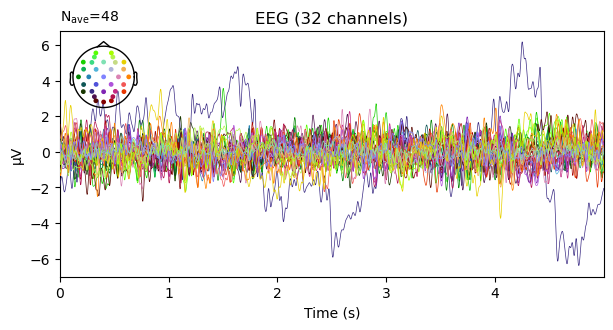

Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


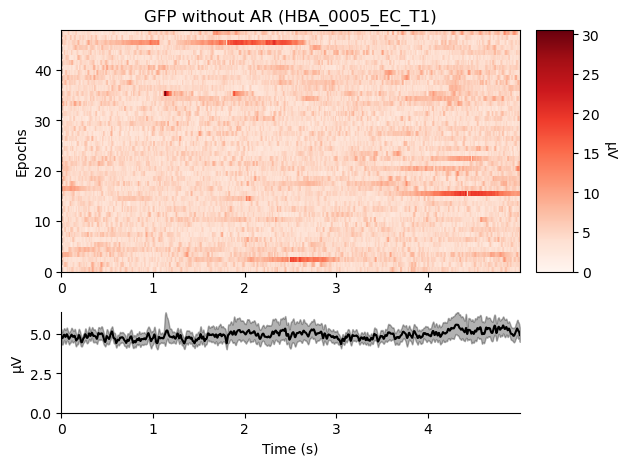

---
APPLYING GLOBAL AR

Estimating rejection dictionary for eeg
Dropping epochs with rejection threshold: {'eeg': 9.629392739606295e-05}
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
6 bad epochs dropped
---
APPLYING LOCAL AR

Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/42 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/42 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/42 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/42 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=1.00 and n_interpolate=31


  0%|          | Repairing epochs : 0/42 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


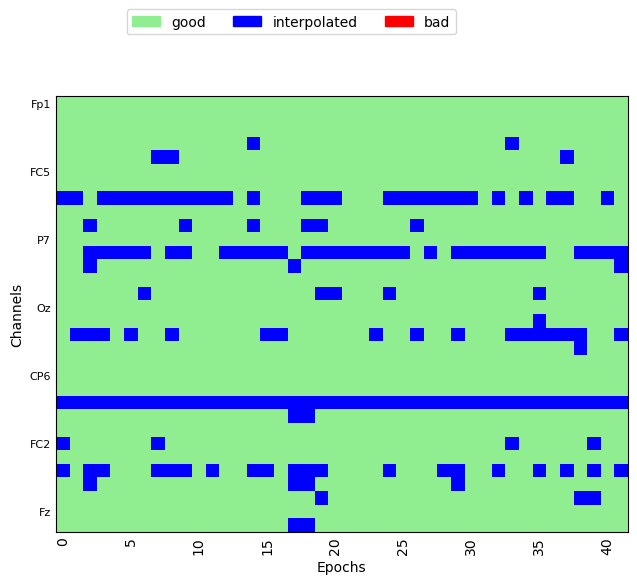

---
EPOCHS AFTER AR



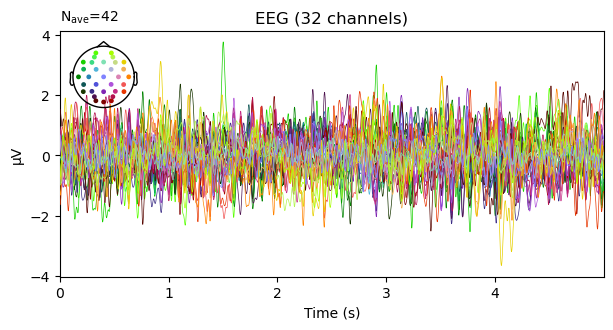

Not setting metadata
42 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


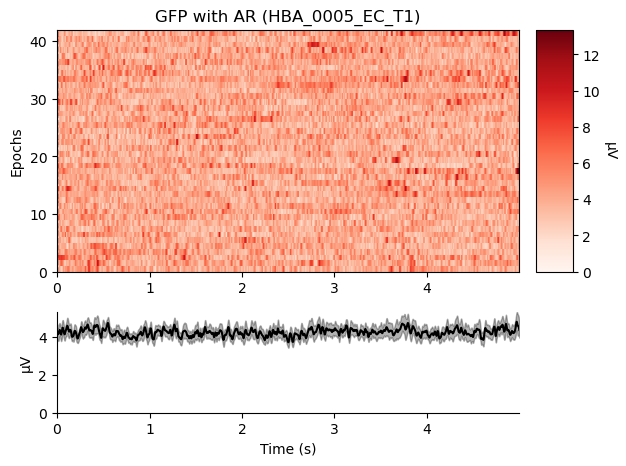

Overwriting existing file.


In [4]:
for i in range(len(file_dirs)):
    # Read in the raw EEG data
    raw = mne.io.read_raw_bdf(file_dirs[i], infer_types=True, eog=eog_channels,
                              stim_channel=stimulus_channel)

    # Set the right montage (Biosemi32) and set reference as average across all channels
    raw = raw.set_montage(mne.channels.make_standard_montage(montage)).load_data()\
             .set_eeg_reference(ref_channels=reference, verbose=True)

    # Find event markers for the start and end of resting state recordings
    events = mne.find_events(raw, stim_channel=stimulus_channel, consecutive=False, output='offset')
    tminmax = [events[0][0]/raw.info['sfreq'], events[-1][0]/raw.info['sfreq']]

    # Use the markers to crop to EEG signal to leave only the actual resting state
    cropped_raw = raw.crop(tmin=tminmax[0], tmax=tminmax[1])
    cropped_raw = cropped_raw.drop_channels(stimulus_channel)
    print(('Event markers are following:\n{}\nStarting point: {} s\nEnding point: {} s\n'
           'Total duration: {} s').format(events, tminmax[0], tminmax[1], tminmax[1]-tminmax[0]))
    
    # Filter the signal with bandpass filter and remove EOG artefacts with SSP
    filt = pre_process.filter_raw_data(cropped_raw, filter_design, line_remove=None,
                                       eog_channels=eog_channels, plot_filt=False, savefig=False)

    # Divide the filtered signal to epochs and run Autoreject artefact rejection on the epochs
    %matplotlib inline
    epochs = pre_process.artefact_rejection(filt,subject_names[i],epo_duration=epochs_duration)

    # (Optional) for displaying interactive EEG plots to visually inspect the signal quality
    #%matplotlib qt
    #epochs.plot(n_channels=32,n_epochs=1)

    # Try to create a directory and save the EEG file to that directory
    try:
        os.makedirs(export_dir)
    except FileExistsError:
        pass
    try:
        mne.Epochs.save(epochs,fname='{}/{}_clean-epo.fif'.format(export_dir,subject_names[i]),
                                                                  overwrite=True)
    except FileExistsError:
        pass

### SPECTRAL APERIODIC ACTIVITY ANALYSIS

**Spectral analysis** within this study includes estimating `Welch's power spectrum density (PSD)` for all the participants at two brain regions (i.e., `frontal` and `parietal`). The PSDs are fitted with `specparam` (`FOOOF`) model to estimate aperiodic 1/f-like component in the spectra which can be described with parameters exponent and offset.

Welch's PSD is calculated for `1-30 Hz` frequency range using `2.5-second Hamming window (50% overlap)` and 9 times the window (22.5 seconds) zero-padding.

The PSD is fitted for aperiodic component of the spectra using the FOOOF algorithm (version 1.0.0). Settings for the algorithm were set as: `peak width limits : 1-12 Hz`; `max number of peaks : infinite`; `minimum peak height : 0.225 uV^2`; `peak threshold : 2.0 uV^2`; and `aperiodic mode : fixed`. Power spectra were parameterized across the frequency range `1 to 30 Hz`.

The aperiodic 1/f-like fit is described with the following function, where $S$ is aperiodic component, $b$ is `offset`, $F$ is vector of frequencies, and $e$ is `exponent`:

$S=b-log(F^e)$


The results (i.e., exponent and offset) are saved as Excel spreadsheets for each region of interest to `results_folder/exp_folder`.

In [5]:
### DEFINE ###
brain_regions = {'Frontal':['Fp1','Fp2','AF3','AF4','F3','F4','F7','F8','Fz',
                            'FC5','FC6','FC1','FC2'],
                 'Parietal':['C3','C4','Cz','CP5','CP6','CP1','CP2','P3','P4',
                            'Pz','PO3','PO4']}
                            
psd_params = dict(method='welch', fminmax=[1, 30], window='hamming', window_duration=2.5,
                  window_overlap=0.5, zero_padding=9)
fooof_params = dict(peak_width_limits=[1,12], max_n_peaks=float("inf"), min_peak_height=0.225,
                    peak_threshold=2.0, aperiodic_mode='fixed')

data_kwargs = {'color' : 'black', 'linewidth' : 1.4, 'label' : 'Original'}
model_kwargs = {'color' : 'red', 'linewidth' : 1.4, 'alpha' : 0.75, 'label' : 'Full model'}
aperiodic_kwargs = {'color' : 'blue', 'linewidth' : 1.4, 'alpha' : 0.75,
                    'linestyle' : 'dashed', 'label' : 'Aperiodic model'}
plot_rich = True
savefig = True

# Set the directory in progress and find all FIF (clean EEG) files in there
dir_inprogress = os.path.join(clean_folder, exp_folder)
file_dirs, subject_names = arrange.read_files(dir_inprogress, '_clean-epo.fif')
arrange.create_results_folders(exp_folder=exp_folder, results_folder=results_folder, fooof=True)

Files in Data/Clean/LEISURE/Eyes Closed/T1 read in: 1


---
PSD (welch) calculation

<Power Spectrum (from Epochs, welch method) | 42 epochs × 32 channels × 726 freqs, 1.0-30.0 Hz>
Window type: hamming
Window size: 2560
Overlap: 1280
Zero-padding: 23040

Samples per segment: 2560
Samples for FFT: 25600
Frequency resolution: 0.040000000000000036 Hz


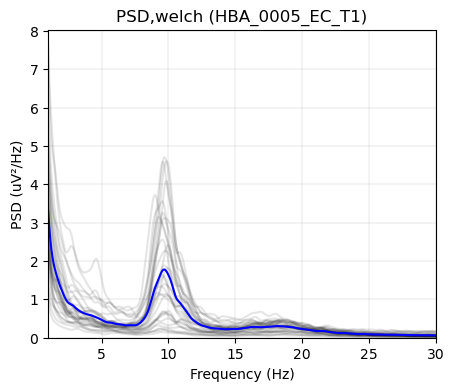

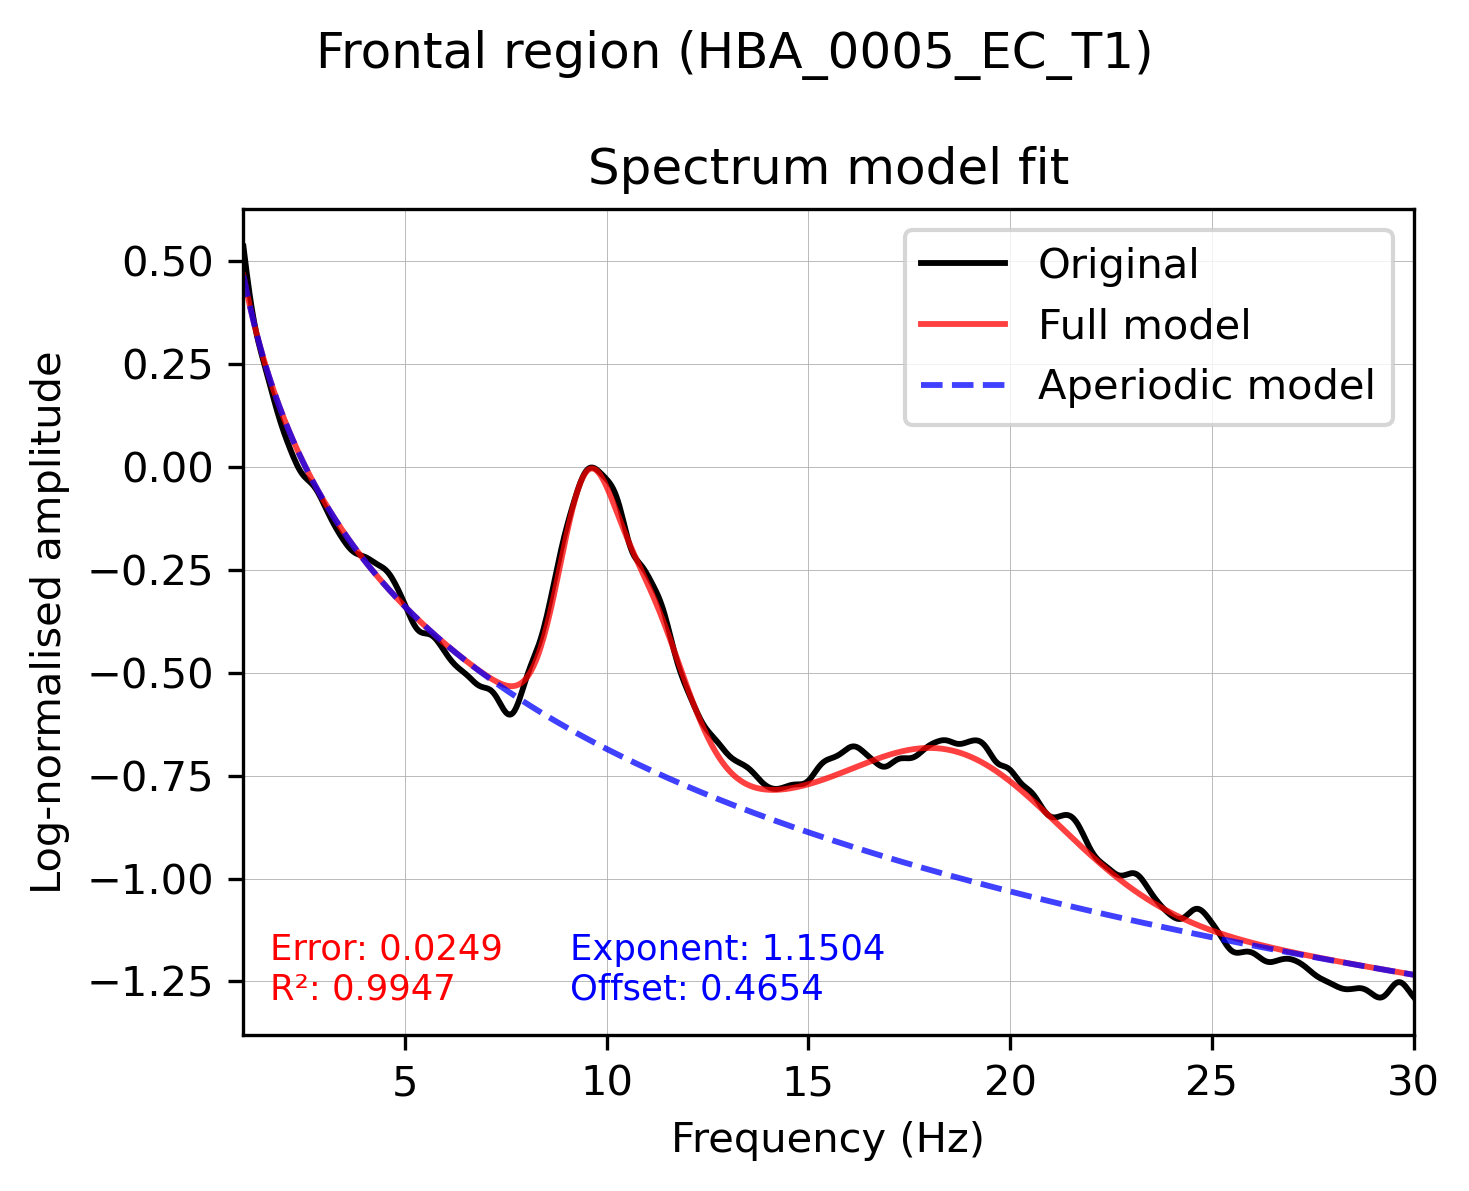

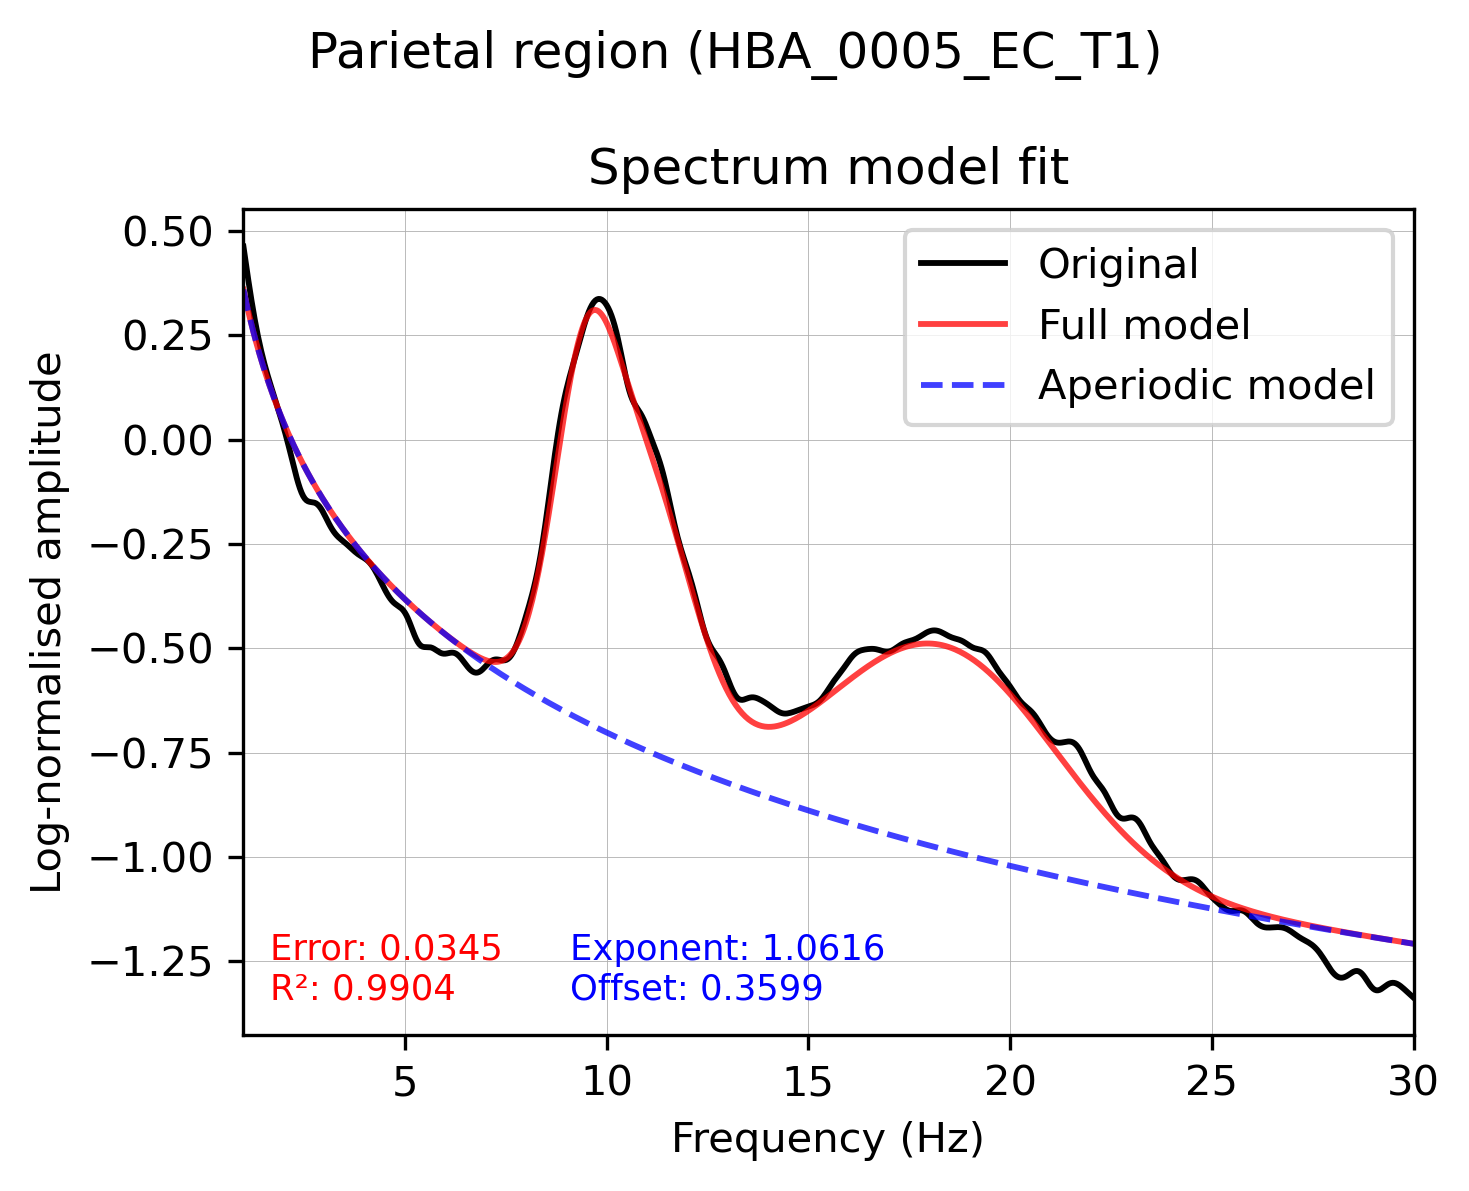

,Exponent,Offset,R_2,Error
HBA_0005_EC_T1,1.150418,0.465375,0.994711,0.024942


,Exponent,Offset,R_2,Error
HBA_0005_EC_T1,1.061559,0.359904,0.990382,0.034538


In [6]:
for i in range(len(file_dirs)):
    # Read in the clean EEG data
    epochs = mne.read_epochs(fname='{}/{}_clean-epo.fif'.format(dir_inprogress, subject_names[i]),
                                                                verbose=False)
    
    # Calculate Welch's power spectrum density
    [psds,freqs] = spectr.calculate_psd(epochs, subject_names[i], **psd_params,
                                        verbose=True, plot=True)
    
    # Average all epochs and channels together -> (freq bins,) shape
    if i == 0:
        psds_allch = np.zeros(shape=(len(file_dirs), len(freqs)))
        aps = [[None]*len(file_dirs)]*len(brain_regions.keys())
    psds_allch[i] = psds.mean(axis=(0, 1))

    # Average all epochs together for each channel and also for each region
    psds = psds.mean(axis=(0))
    df_psds_ch = arrange.array_to_df(subject_names[i], epochs, psds).\
                         reset_index().drop(columns='Subject')
    df_psds_regions = arrange.df_channels_to_regions(df_psds_ch, brain_regions).\
                              reset_index().drop(columns='Subject')

    # Go through all regions of interest
    for region in df_psds_regions.columns:
        if i == 0:
            globals()["df_fooof_"+region] = pd.DataFrame(index=subject_names)
        psds_temp = df_psds_regions[region].to_numpy()

        # Fit the spectrum with FOOOF        
        fm = FOOOF(**fooof_params, verbose=True)
        fm.fit(freqs, psds_temp, psd_params['fminmax'])

        # Plot power spectrum model + aperiodic fit
        fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), dpi=300)
        plot_spectrum(fm.freqs, fm.power_spectrum,
                      ax=axs, plot_style=None, **data_kwargs)
        plot_spectrum(fm.freqs, fm.fooofed_spectrum_,
                      ax=axs, plot_style=None, **model_kwargs)
        plot_spectrum(fm.freqs, fm._ap_fit,
                      ax=axs, plot_style=None, **aperiodic_kwargs)
        axs.set_xlim(psd_params['fminmax'])
        axs.grid(linewidth=0.2)
        axs.set_xlabel('Frequency (Hz)')
        axs.set_ylabel('Log-normalised amplitude')
        axs.set_title('Spectrum model fit')
        axs.legend()

        # If true, plot all the exported variables on the plots
        if plot_rich == True:
            axs.annotate('Error: ' + str(np.round(fm.get_params('error'), 4)) +
                        '\nR\u00b2: ' + str(np.round(fm.get_params('r_squared'), 4)),
                        (0.18, 0.16), xycoords='figure fraction', color='red', fontsize=8.5)
            axs.annotate('Exponent: ' + str(np.round(fm.get_params('aperiodic_params','exponent'), 4)) +
                        '\nOffset: ' + str(np.round(fm.get_params('aperiodic_params','offset'), 4)),
                        (0.38, 0.16), xycoords='figure fraction', color='blue', fontsize=8.5)
        
        plt.suptitle('{} region ({})'.format(region,subject_names[i]))
        plt.tight_layout()
        if savefig == True:
            plt.savefig(fname='{}/{}/FOOOF/{}_{}_{}_fooof.png'.format(results_folder, exp_folder,
                                                                      exp_condition, subject_names[i],
                                                                      region))
        plt.show()

        # Add model parameters to dataframe
        globals()["df_fooof_"+region].loc[globals()["df_fooof_"+region].index[i],'Exponent']\
                                                         = fm.get_params('aperiodic_params','exponent')
        globals()["df_fooof_"+region].loc[globals()["df_fooof_"+region].index[i],'Offset']\
                                                         = fm.get_params('aperiodic_params','offset')
        globals()["df_fooof_"+region].loc[globals()["df_fooof_"+region].index[i],'R_2']\
                                                         = fm.get_params('r_squared')
        globals()["df_fooof_"+region].loc[globals()["df_fooof_"+region].index[i],'Error']\
                                                         = fm.get_params('error')

# Export aperiodic data for all regions
for region in df_psds_regions.columns:
    globals()["df_fooof_"+region].to_excel('{}/{}/FOOOF/{}_{}_fooof.xlsx'.format(results_folder,
                                                                                 exp_folder,
                                                                                 exp_condition,
                                                                                 region))
    display(globals()["df_fooof_"+region])